# IBM Attrition assignment 2

In [1]:
#imports needed

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the csv file

ibm_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
ibm_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Show a breakdown of distance from home by job role and attrition.

In [6]:
ibm_data1 = ibm_data[['Attrition', 'DistanceFromHome', 'JobRole', 'Education', 'MonthlyIncome']]
ibm_data1

,Attrition,DistanceFromHome,JobRole,Education,MonthlyIncome
0,Yes,1,Sales Executive,2,5993
1,No,8,Research Scientist,1,5130
2,Yes,2,Laboratory Technician,2,2090
3,No,3,Research Scientist,4,2909
4,No,2,Laboratory Technician,1,3468
...,...,...,...,...,...
1465,No,23,Laboratory Technician,2,2571
1466,No,6,Healthcare Representative,1,9991
1467,No,4,Manufacturing Director,3,6142
1468,No,2,Sales Executive,3,5390


In [8]:
#using dummy endoding technique
ibm_data2 = ibm_data1[['DistanceFromHome', 'JobRole', 'Attrition']]
ibm_data2

,DistanceFromHome,JobRole,Attrition
0,1,Sales Executive,Yes
1,8,Research Scientist,No
2,2,Laboratory Technician,Yes
3,3,Research Scientist,No
4,2,Laboratory Technician,No
...,...,...,...
1465,23,Laboratory Technician,No
1466,6,Healthcare Representative,No
1467,4,Manufacturing Director,No
1468,2,Sales Executive,No


In [13]:
attrition = pd.get_dummies(ibm_data2.Attrition, prefix = 'Attrition', prefix_sep = '_')

In [14]:
attrition

,Attrition_No,Attrition_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
1465,1,0
1466,1,0
1467,1,0
1468,1,0


In [16]:
ibm_data2 = pd.concat([ibm_data2, attrition], axis = 1)

In [17]:
ibm_data2 = ibm_data2.drop('Attrition', 1)

In [18]:
ibm_data2

,DistanceFromHome,JobRole,Attrition_No,Attrition_Yes
0,1,Sales Executive,0,1
1,8,Research Scientist,1,0
2,2,Laboratory Technician,0,1
3,3,Research Scientist,1,0
4,2,Laboratory Technician,1,0
...,...,...,...,...
1465,23,Laboratory Technician,1,0
1466,6,Healthcare Representative,1,0
1467,4,Manufacturing Director,1,0
1468,2,Sales Executive,1,0


In [20]:
ibm_data3 = ibm_data2.groupby(['DistanceFromHome', 'JobRole']).sum()
ibm_data3 

Attrition_No  Attrition_Yes
DistanceFromHome JobRole                                               
1                Healthcare Representative            23              0
                 Human Resources                       8              1
                 Laboratory Technician                27              4
                 Manager                              13              0
                 Manufacturing Director               23              1
...                                                  ...            ...
29               Manager                               3              1
                 Manufacturing Director                4              0
                 Research Scientist                    3              1
                 Sales Executive                       4              1
                 Sales Representative                  1              0

[224 rows x 2 columns]

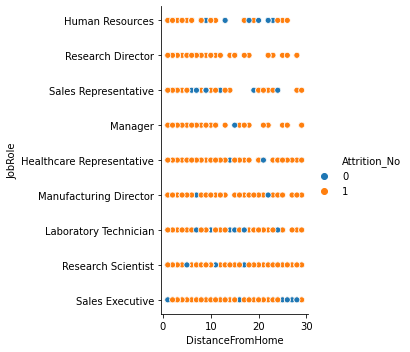

In [46]:
sns.relplot(x='DistanceFromHome',y='JobRole',hue=('Attrition_No'),data=ibm_data2)

# Compare average monthly income by education and attrition.

In [21]:
ibm_data1['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [23]:
ibm_data4 = ibm_data1[['Education','MonthlyIncome','Attrition']]
ibm_data4

,Education,MonthlyIncome,Attrition
0,2,5993,Yes
1,1,5130,No
2,2,2090,Yes
3,4,2909,No
4,1,3468,No
...,...,...,...
1465,2,2571,No
1466,1,9991,No
1467,3,6142,No
1468,3,5390,No


In [26]:
ibm_data5 = ibm_data4.groupby(['Education','Attrition']).mean()
ibm_data5

MonthlyIncome
Education Attrition               
1         No           5926.129496
          Yes          4360.161290
2         No           6586.058824
          Yes          4282.545455
3         No           6882.919662
          Yes          4770.242424
4         No           7087.814706
          Yes          5335.155172
5         No           8559.906977
          Yes          5850.200000

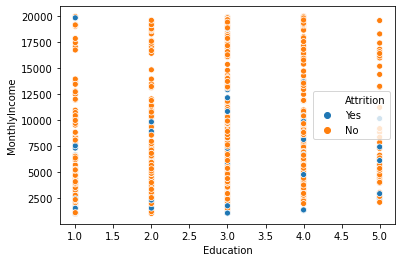

In [33]:
sns.scatterplot(data=ibm_data4,x='Education',y='MonthlyIncome',hue='Attrition')